# ***P318***

In [1]:
!wget http://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

--2022-07-18 01:32:17--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-07-18 01:32:17--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-07-18 01:32:17--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connect

In [2]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


In [3]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n=len(arr)
  rows=int(np.ceil(n/10))
  cols=n if rows<2 else 10
  fig,axs=plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

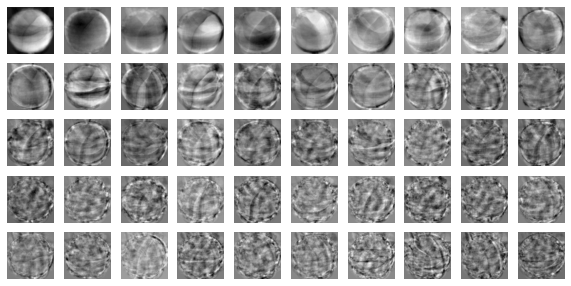

In [4]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [5]:
print(fruits_2d.shape)
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [7]:
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


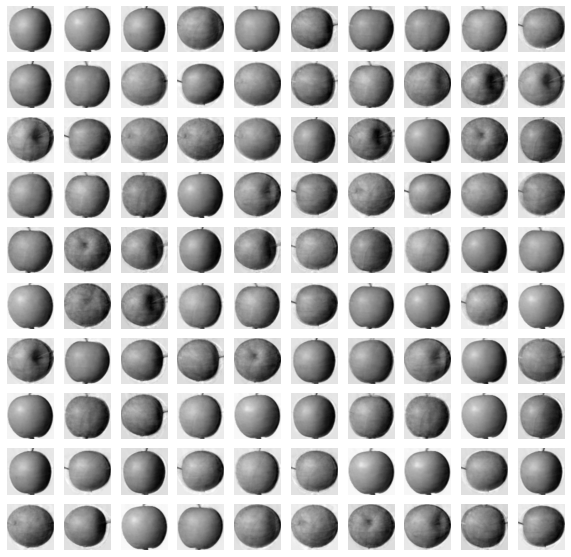

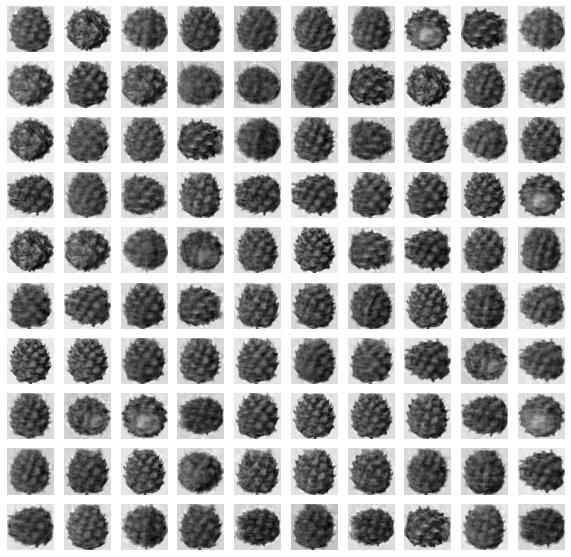

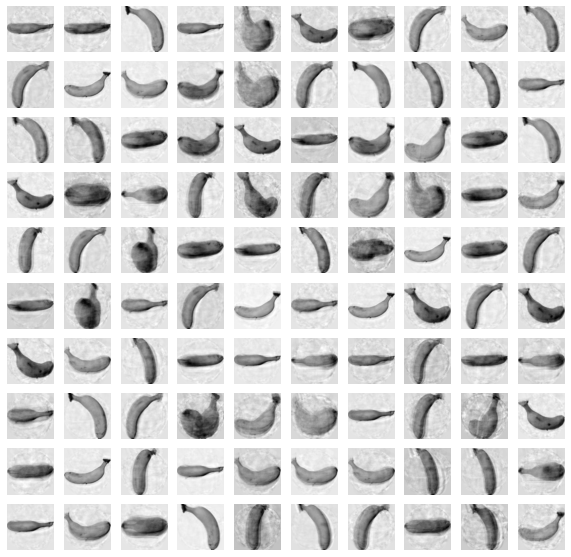

In [9]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

0.9214862271357063


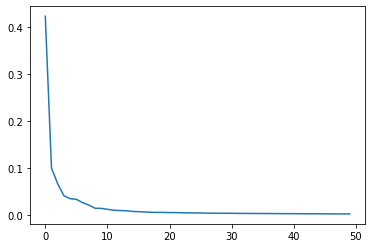

In [11]:
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
target=np.array([0]*100+[1]*100+[2]*100)
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.0969985961914062


In [17]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.029624462127685547


In [18]:
pca=PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [20]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

(300, 2)
0.99
0.04666008949279785


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [21]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


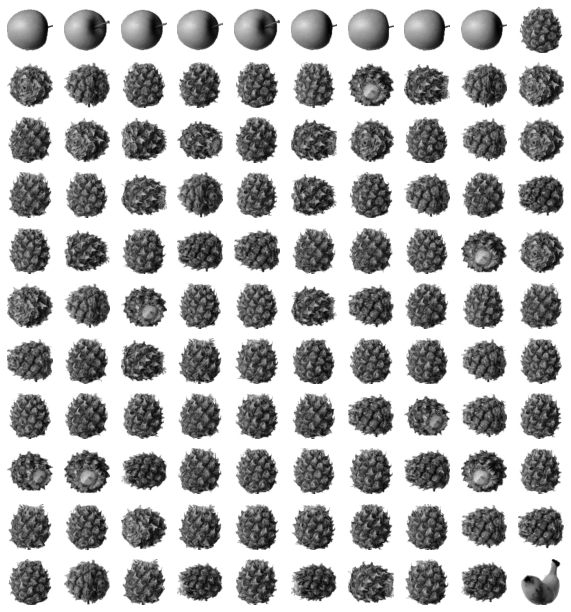

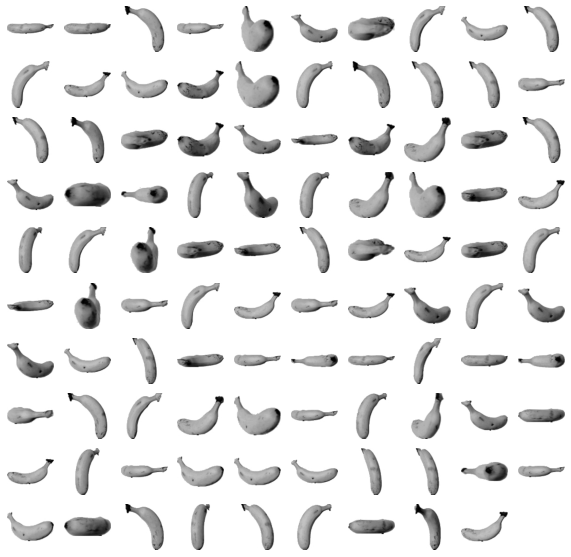

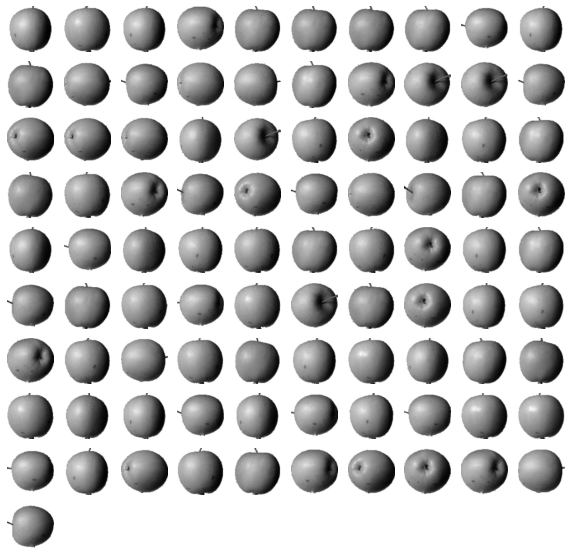

In [23]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print('\n')

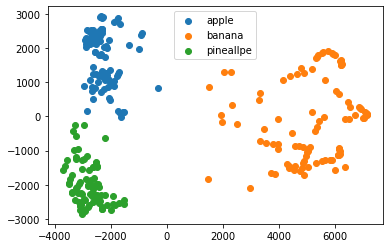

In [24]:
for label in range(0,3):
  data=fruits_pca[km.labels_==label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineallpe'])
plt.show()